**Название проекта**

Исследование закономерностей, влияющих на успешность игры

**Цель исследования:** 

Поиск зависимостей, которые существуют на рынке компьютерных игр, которые позволят сделать ставку на потенциально популярный продукт и правильно спланировать рекламные кампании.
- исследование параметров таких как данные о продажах игр, оценки пользователей и экспертов, жанры и платформы
- исследование влияния параметров на итоговые продажи 

**Ход исследования:**
1. Загрузка данных и подготовка их к анализу
2. Исследовательский анализ данных
3. Проверка гипотез
4. Вывод


**Краткое описание проекта**

Я - аналитик в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных:**
- name — название игры
- platform — платформа
- year_of_release — год выпуска
- genre — жанр игры
- na_sales — продажи в Северной Америке (миллионы проданных копий)
- eu_sales — продажи в Европе (миллионы проданных копий)
- jp_sales — продажи в Японии (миллионы проданных копий)
- other_sales — продажи в других странах (миллионы проданных копий)
- critic_score — оценка критиков (максимум 100)
- user_Score — оценка пользователей (максимум 10)
- rating — рейтинг от организации ESRB


# 1. Загрузка данных и подготовка их к анализу


## 1.1. Обзор данных

In [ ]:
# загрузим библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [ ]:
# откроем файл с данными
df = pd.read_csv('/content/drive/MyDrive/ЯПрактикум - АЛЛА/Спринт 5. Сборный проект/games.csv')



In [ ]:
# изучим общую информацию
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## 1.2. Предобработка данных

In [ ]:
# приведем названия столбцов к нижнему регистру
df = df.rename(columns = {'Name':'name','Platform':'platform','Year_of_Release':'year_of_release','Genre':'genre','NA_sales':'na_sales','EU_sales':'eu_sales','JP_sales':'jp_sales','Other_sales':'other_sales','Critic_Score':'critic_score','User_Score':'user_score','Rating':'rating'})

In [ ]:
# заменим тип данных в столбцe с данными об оценке пользователей на формат float, тк числа после запятой в оценках имеют смысл
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')

В столбцах с данными о продажах оставлен тип float, т.к при переводе в целочисленный тип ~98% данных смещается к нулю и искажает дальнейший анализ.

In [ ]:
# определяем в каких столбцах есть пропуски в %
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


In [ ]:
# заменим пропуски в столбце с рейтингом на заглушку unknown, в столбцах с оценками - 999999
df['rating'] = df['rating'].fillna('unknown')
df['user_score'] = df['user_score'].fillna(999999)
df['critic_score'] = df['critic_score'].fillna(999999)

In [ ]:
# добавим новый столбцец с суммарными продажами во всех регионах
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [ ]:
# проверим количество строк-дубликатов в данных
df.duplicated().sum()

0

In [ ]:
# удалим пропуски в столбце name
df=df.dropna(subset=['name'])

In [ ]:
# удалим пропуски в столбце genre
df=df.dropna(subset=['genre'])

In [ ]:
# удалим пропуски в столбце genre
df=df.dropna(subset=['year_of_release'])

In [ ]:
# еще раз перепроверим данные
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


**в данном разделе мы:**
- исправили наименования столбцов
- заменили тип данных в столбцe с данными об оценке пользователей
- проверили данные на наличие пропусков и отработали их
- проверили данные на наличие дубликатов и удалили их
- добавили новый столбцец с суммарными продажами

# 2. Исследовательский анализ данных

## 2.1. Изучение информации о количестве выпускаемых игр по годам

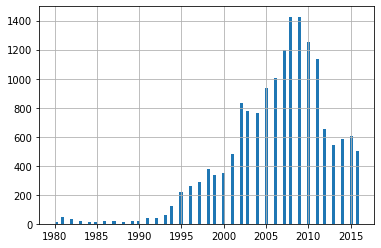

In [ ]:
# Посмотрим сколько игр выпускалось в каждом году
df['year_of_release'].hist(bins=100);

*Наиболее продуктивным в разработке игр был период с 2005 по 2011, в среднем выпускалось по 1200 игр в год. Далее произошел спад и с 2012 по 2016 выпуск в среднем сократился в два раза.*

## 2.2. Изучение информации по параметру "Игровые платформы"

In [ ]:
# выведем платформы и их суммарные продажи
platform_pivot = df.pivot_table(index='platform',values='total_sales',aggfunc='sum')
platform_pivot['share'] = platform_pivot['total_sales']/platform_pivot['total_sales'].sum()*100
platform_pivot.sort_values('total_sales', ascending=False).head(15)

,total_sales,share
platform,,
PS2,1233.56,13.994874
X360,961.24,10.905374
PS3,931.34,10.566155
Wii,891.18,10.110535
DS,802.78,9.107628
PS,727.58,8.254475
PS4,314.14,3.563953
GBA,312.88,3.549658
PSP,289.53,3.284750


*За исследуемый период 11 платформ обеспечивали выпуск игр, составляющих 80% от всех продаж. Основной лидер - PS2.*

In [ ]:
# определим средний срок "жизни" платформы
live_platform = df.pivot_table(index='platform',values='year_of_release',aggfunc=('min','max'))
live_platform['delta'] = live_platform['max']-live_platform['min']
live_platform['delta'].mean()

7.612903225806452

## 2.3. Определение актуального периода для дальнейшего исследования данных

In [ ]:
# обозначим актуальный период (возьмем 5 лет)
actual_period = df.query('year_of_release >= 2012')

Учитывая бизнес-практику отрасли, по которой делаем проект остановимся на актуальном периоде в 5 лет (это примерно половина срока жизни платформы)

In [ ]:
# отберем ТОР-5 платформ по их суммарным продажам за актуальный период
selection_top_platform = actual_period.pivot_table(index='platform',values='total_sales',aggfunc='sum')
selection_top_platform['share'] = selection_top_platform['total_sales']/selection_top_platform['total_sales'].sum()*100
selection_top_platform.sort_values('total_sales', ascending=False).head(15)

,total_sales,share
platform,,
PS4,314.14,21.716798
PS3,288.79,19.964328
X360,236.54,16.352236
3DS,194.61,13.453575
XOne,159.32,11.013944
WiiU,82.19,5.681873
PC,62.65,4.331054
PSV,49.18,3.399860
Wii,35.37,2.445162


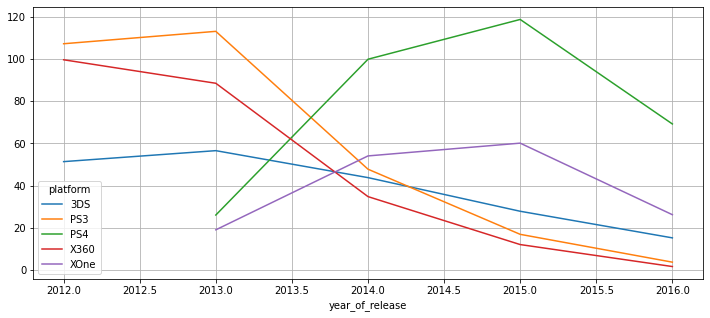

In [ ]:
# построим распределение по годам по TOP-5 платформам за актуальный период
top_platform = ['PS4','X360','PS3','XOne','3DS']
top_platform_detail = actual_period.query('platform in @top_platform').pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum').plot(grid=True,figsize=(12, 5))


*На графике видим, что в момент выхода PS4 и XOne предыдущие платформы стали падать в продажах. PS4 становится лидером продаж.*

##2.4. График «ящик с усами» по глобальным продажам игр в разбивке по платформам

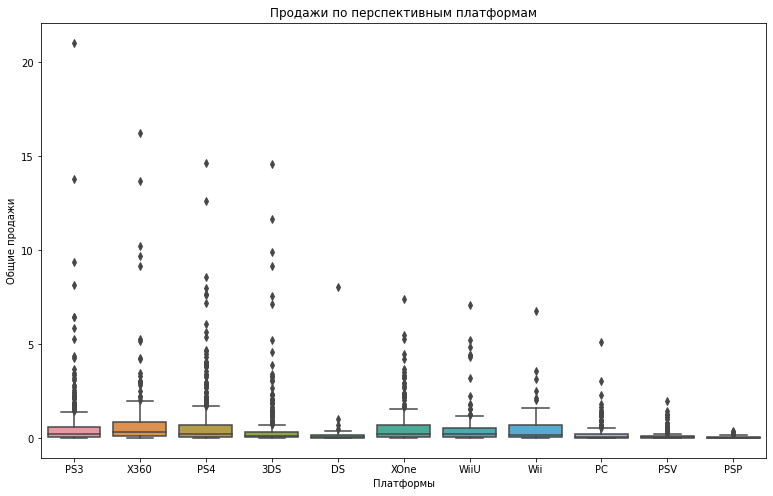

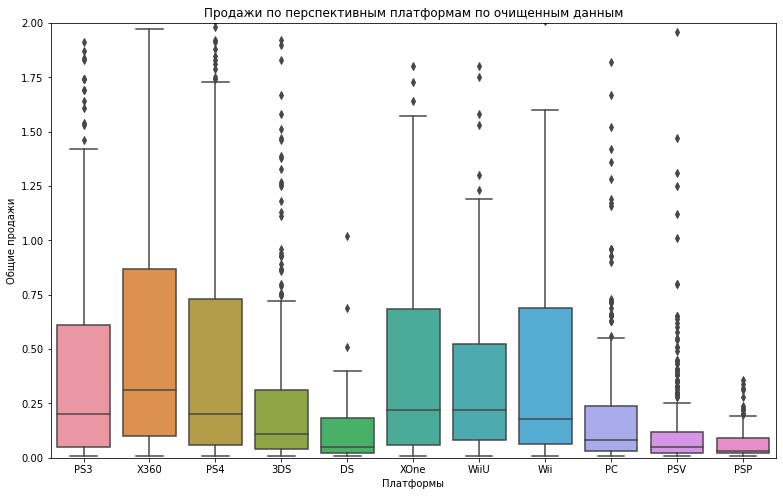

In [ ]:
# построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
import seaborn as sns
data_temp, y = actual_period, 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))

# построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам (без выбросов)
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам по очищенным данным', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()

## 2.5. Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы 

0.40656790206178095

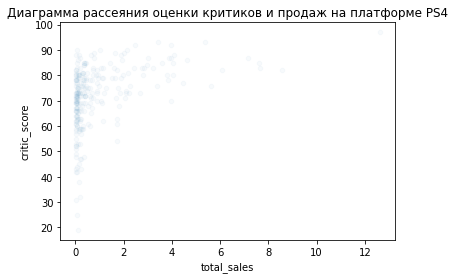

In [ ]:
# посмотрим, как влияют на продажи внутри одной платформы (PS4) отзывы критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
df1_PS4 = actual_period.query('platform == "PS4" and critic_score !=999999')
df1_PS4.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.03,title='Диаграмма рассеяния оценки критиков и продаж на платформе PS4');
df1_PS4['critic_score'].corr(df1_PS4['total_sales'])

-0.031957110204556424

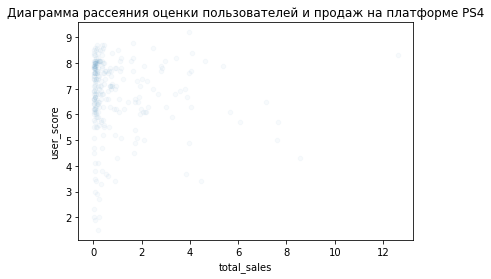

In [ ]:
# посмотрим, как влияют на продажи внутри одной платформы (PS4) отзывы пользователей. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
df2_PS4 = actual_period.query('platform == "PS4" and user_score !=999999')
df2_PS4.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.03,title='Диаграмма рассеяния оценки пользователей и продаж на платформе PS4');
df2_PS4['user_score'].corr(df2_PS4['total_sales'])

0.3314972592629587

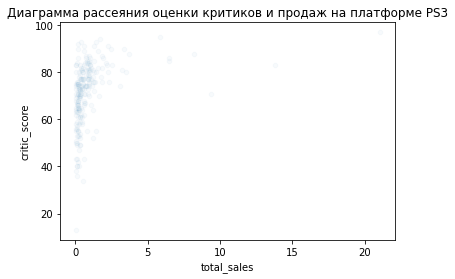

In [ ]:
# посмотрим, как влияют на продажи внутри одной платформы (PS3) отзывы критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
df1_PS3 = actual_period.query('platform == "PS3" and critic_score !=999999')
df1_PS3.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.03,title='Диаграмма рассеяния оценки критиков и продаж на платформе PS3');
df1_PS3['critic_score'].corr(df1_PS3['total_sales'])

-0.005143522887113815

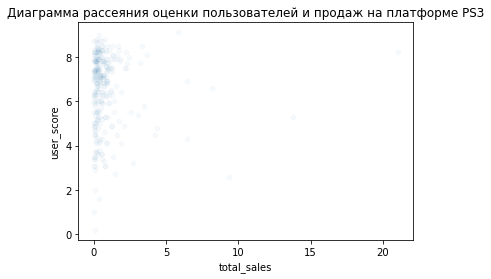

In [ ]:
# посмотрим, как влияют на продажи внутри одной платформы (PS3) отзывы пользователей. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
df2_PS3 = actual_period.query('platform == "PS3" and user_score !=999999')
df2_PS3.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.03,title='Диаграмма рассеяния оценки пользователей и продаж на платформе PS3');
df2_PS3['user_score'].corr(df2_PS3['total_sales'])

0.3605734888507336

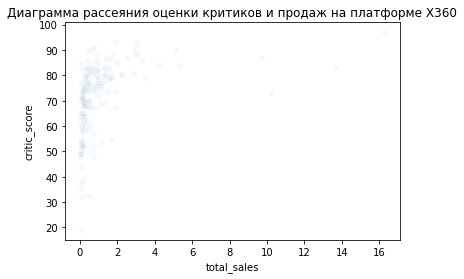

In [ ]:
# посмотрим, как влияют на продажи внутри одной платформы (X360) отзывы критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
df1_X360 = actual_period.query('platform == "X360" and critic_score !=999999')
df1_X360.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.03,title='Диаграмма рассеяния оценки критиков и продаж на платформе X360');
df1_X360['critic_score'].corr(df1_X360['total_sales'])

-0.0020140394826897853

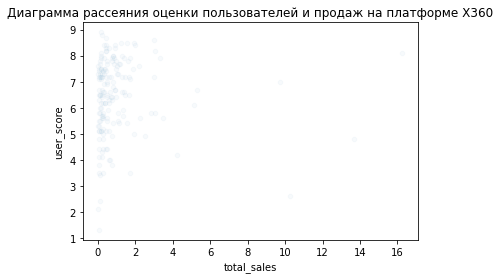

In [ ]:
# посмотрим, как влияют на продажи внутри одной платформы (X360) отзывы пользователей. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
df2_X360 = actual_period.query('platform == "X360" and critic_score !=999999')
df2_X360.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.03,title='Диаграмма рассеяния оценки пользователей и продаж на платформе X360');
df2_X360['user_score'].corr(df2_X360['total_sales'])

0.3208028695360785

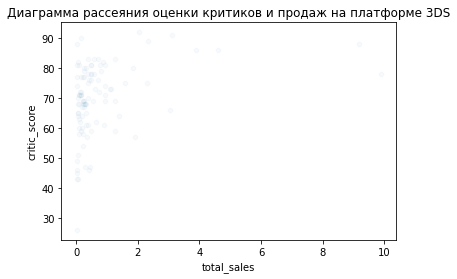

In [ ]:
# посмотрим, как влияют на продажи внутри одной платформы (3DS) отзывы критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
df1_3DS = actual_period.query('platform == "3DS" and critic_score !=999999')
df1_3DS.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.03,title='Диаграмма рассеяния оценки критиков и продаж на платформе 3DS');
df1_3DS['critic_score'].corr(df1_3DS['total_sales'])


0.19758263411038599

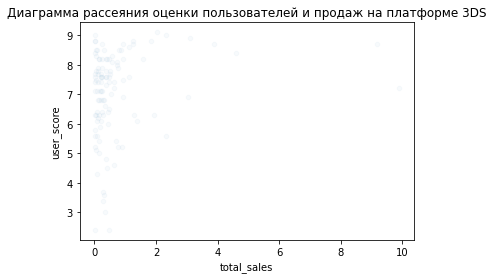

In [ ]:
# посмотрим, как влияют на продажи внутри одной платформы (3DS) отзывы пользователей. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
df2_3DS = actual_period.query('platform == "3DS" and user_score !=999999')
df2_3DS.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.03,title='Диаграмма рассеяния оценки пользователей и продаж на платформе 3DS');
df2_3DS['user_score'].corr(df2_3DS['total_sales'])


0.4169983280084017

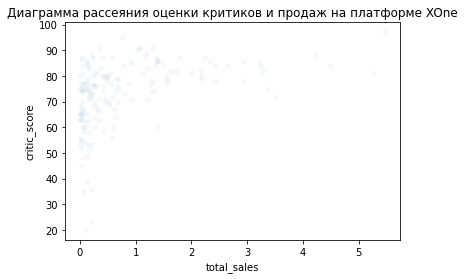

In [ ]:
# посмотрим, как влияют на продажи внутри одной платформы (XOne) отзывы критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
df1_XOne = actual_period.query('platform == "XOne" and critic_score !=999999')
df1_XOne.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.03,title='Диаграмма рассеяния оценки критиков и продаж на платформе XOne');
df1_XOne['critic_score'].corr(df1_XOne['total_sales'])

-0.06892505328279414

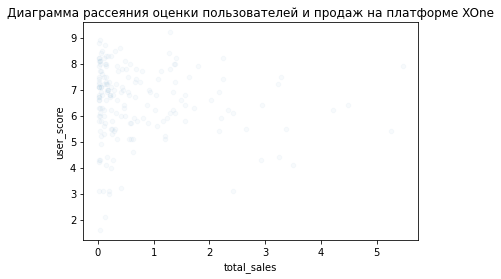

In [ ]:
# посмотрим, как влияют на продажи внутри одной платформы (XOne) отзывы пользователей. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
df2_XOne = actual_period.query('platform == "XOne" and user_score !=999999')
df2_XOne.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.03,title='Диаграмма рассеяния оценки пользователей и продаж на платформе XOne');
df2_XOne['user_score'].corr(df2_XOne['total_sales'])


*Корреляция между отзывами критиков и продажами наблюдается у всех ТОР-5 платформ. А вот с отзывами пользователей ситуация обратная по всем платформам, кроме 3DS*

## 2.6. Изучение общего распределения игр по жанрам

In [ ]:
# выведем жанры и их медианые продажи
actual_period.groupby('genre')['total_sales'].median().sort_values(ascending=False)

genre
Shooter         0.440
Sports          0.240
Platform        0.210
Role-Playing    0.140
Racing          0.140
Fighting        0.130
Action          0.120
Misc            0.120
Simulation      0.120
Strategy        0.080
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

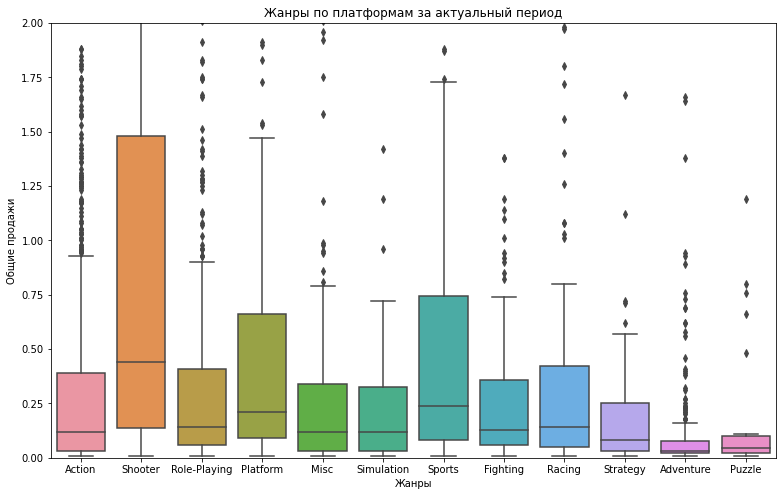

In [ ]:
# построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
plt.figure(figsize=(13, 8))
(sns.boxplot(data = actual_period, y ='total_sales', x='genre')
    .set(title = 'Жанры по платформам за актуальный период', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 2)))
 
plt.show()

TOP-3 продаваемых жанров: Стрельба, Спорт и Платформер. Посмотрим как распределятся жанры между пользователями из Европы, Северной Америки и Японии.

## 2.7. Портрет пользователей

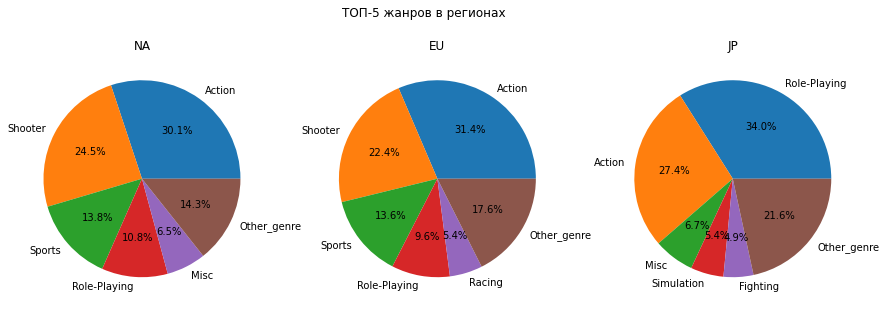

In [ ]:
# ТОП-5 жанров в регионах
games_fresh = actual_period.copy()
# задаем список регионов
countries = games_fresh.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
  # выберем 5 самых продающих жанров
  df_i = (games_fresh.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в другие жанры - Other_genre
  df_i = df_i.append({'genre': 'Other_genre', countries[i]: games_fresh[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

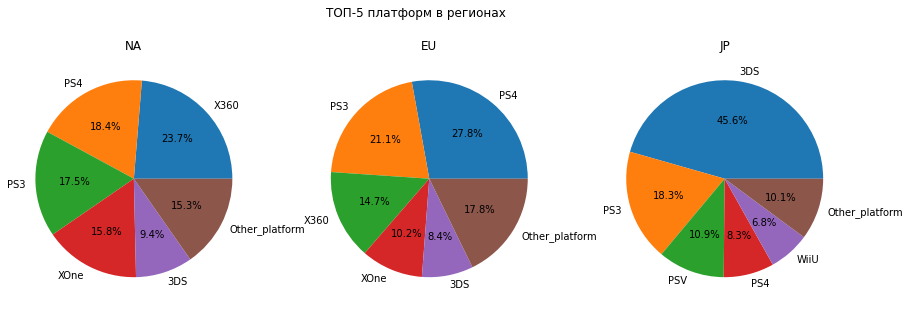

In [ ]:
# ТОП-5 платформ врегионах
games_fresh = actual_period.copy()
# задаем список регионов
countries = games_fresh.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
  # выберем 5 самых продающих платформ
  df_i = (games_fresh.groupby('platform')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в другие платформы - Other_platform
  df_i = df_i.append({'platform': 'Other_platform', countries[i]: games_fresh[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['platform'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

Портрет пользователя компьютерных игр из Европы: почти половина пользователeй (49%) обладатели приставок PS4 и PS3, предпочитающие жанры - экшн (31%), стрельба (22%).

Портрет пользователя компьютерных игр из Северной Америки: четверть пользователей (24%) предпочитают консоль X360 и чуть меньше - PS4. Жанр-лидер - экшн (30%) и стрельба (25%)

Портрет пользователя компьютерных игр из Японии значительно отличается от остальных. Почти половина пользователей предпочитают карманную игровую консоль (46%), предполагаю что причина этому - портативность и мобильность (игра в любом месте), а жанр - ролевые игры (34%) и экшн (27%).

In [ ]:
# построим рейтинговую таблицу по регионам продаж
rating_ESRB = actual_period.groupby('rating')['na_sales','eu_sales','jp_sales','other_sales'].sum()
rating_ESRB

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,na_sales,eu_sales,jp_sales,other_sales
rating,,,,
E,114.37,113.03,28.33,31.44
E10+,75.70,55.37,8.19,16.23
M,231.57,193.96,21.20,63.38
T,66.02,52.96,26.02,17.94
unknown,103.31,91.50,108.84,27.17


**Расшифровка рейтингов**
- AO/ 18+, Примеры: Grand Theft Auto V, Fallout 4
- E/ для всех возрастных групп, Примеры: Просто таннцуй, FIFA
- E10+/ 10+, Примеры: Minecraft Dungeons, Растения против зомби
- EC/ 3+, Примеры: Дора Исследовательница, Сказки Дракона.
- M/ 17+, Примеры: Ark: Survival Evolved, Destiny 2
- RP/ рейтинг не присвоен
- T/ 13+, Примеры: Fortnite, Sims 4

*Можем сделать вывод, что рейтинг ESRB влияет на продажи в отдельном регионе, так в Европе предпочитают игры 17+, а в Америке и Японии преобладают игры для всех возрастных групп.*

# 3. Проверка гипотез

Проверка гипотез начинается с формулировки нулевой гипотезы H0, например, «среднее генеральной совокупности равно A». Исходя из Н0 формулируется альтернативная гипотеза H1 - это утверждение, которое принимается верным, если отбрасывается H0. 

## 3.1. Гипотеза №1

- Н_0: средние пользовательские рейтинги платформы Xbox One **равны** средним пользовательским рейтингам платформы PC
- Н_1: средние пользовательские рейтинги платформы Xbox One **не равны** средним пользовательским рейтингам платформы PC

Не будем указывать параметр equal_var: пусть он примет значение True (у нас достаточно большие и равные по размеру выборки, нет оснований полагать, что разброс будет сильно отличаться)

In [ ]:
# проверим гипотезы
xbox_one = actual_period[(actual_period['platform'] =='XOne') & (actual_period['user_score'] !=999999)]
pc = actual_period[(actual_period['platform'] =='PC') & (actual_period['user_score'] !=999999)]

results = st.ttest_ind(xbox_one['user_score'], pc['user_score'])

alpha = 0.05 

print(results.pvalue)

if results.pvalue < alpha:
  print('Отвергаем нулевую гипотезу')
else:
  print('Не получилось отвергнуть нулевую гипотезу')


0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


In [ ]:
# покажем дополнительно средние пользовательские рейтинги и по платформам, и по жанрам, как иллюстрации не противоречивости наших гипотез
xbox_one.user_score.max(), pc.user_score.max()

(9.2, 9.3)

*Значение p-value показывает: вероятность случайно получить такое или большее различие равно почти 55%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними оценками.*


## 3.2. Гипотеза №2

- Н_0: средние пользовательские рейтинги жанров Action **равны** средним пользовательским рейтингам жанров Sports
- Н_1: средние пользовательские рейтинги жанров Action **не равны** средним пользовательским рейтингам жанров Sports

In [ ]:
# проверим гипотезы
action = actual_period[(actual_period['genre'] =='Action') & (actual_period['user_score'] !=999999)]
sports = actual_period[(actual_period['genre'] =='Sports') & (actual_period['user_score'] !=999999)]

results = st.ttest_ind(action['user_score'], sports['user_score'])

alpha = 0.05 

print(results.pvalue)

if results.pvalue < alpha:
  print('Отвергаем нулевую гипотезу')
else:
  print('Не получилось отвергнуть нулевую гипотезу')

3.7163089460934874e-26
Отвергаем нулевую гипотезу


# 4. Вывод

Исходя из полученных данных и проведенной обработки информации можно сделать следующий вывод:
- наблюдается зависимость между отзывами критиков и продажами у всех ТОР-5 платформ. А вот с отзывами пользователей ситуация обратная по всем платформам, кроме 3DS
- TOP-3 продаваемых жанров в Европе: Стрельба, Гонки и Платформы, в Северной Америке - Стрельба, Спорт и Платформы. В Японии - ролевые игры занимают дллю 85%.
- при планировании продаж стоит учитывать портрет Покупателя, так пользователи из Японии предпочитают карманную игровую консоль, а жанр - ролевые игры. Из Северной Америки - игровую консоль X360 и жанр - Стрельба, из Европы - PS4 и PS3, в преобладающем жанре Стрельба
- рейтинг ESRB влияет на продажи в зависимости от региона продаж, так в Европе в игры играют более взрослое население, а в Америке и Японии преобладают игры для всех возрастных групп.
- средние пользовательские рейтинги платформ XOne и PC равны
- средние пользовательские рейтинги жанров Action и Sports не равны